In [1]:
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import ee
import os

In [2]:
ee.Initialize()

Map = geemap.Map(center=[40,-100], zoom=4)

#Datasets to test on:
daymet_ga = ee.ImageCollection('NASA/ORNL/DAYMET_V4')

In [3]:
#Adding wetlands 

#GCE domain:
gce_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GCE_domain.shp'
gce_lter = 'C:/Users/arj26323/Documents/Data/LTER shapefiles/GCE - Sapelo/GCE_LTER_boundary.shp'

lter = geemap.shp_to_ee(gce_lter)
wet_ga = geemap.shp_to_ee(gce_clip)
dmclip_ga = daymet_ga.map(lambda image: image.clip(wet_ga))

#Flux tower
#Note 1/18/23: Flux tower footprint (fluxproper) OR expanded flux area (fluxdiss)
gce_fluxdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_fluxdissolve.shp'
gce_fluxproper = 'F:/Wetlands shapefiles/GCE flux tower/sapelo_yearly_climatology-2019.shp'
flux_ga = geemap.shp_to_ee(gce_fluxproper)
gce_marsh = geemap.shp_to_ee(gce_fluxdiss)

# Map.addLayer(dmclip_ga, {}, 'Daymet')

gce_clipdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_simpledissolve.shp'
dissolve_ga = geemap.shp_to_ee(gce_clipdiss)

clip_0 = ee.Image(dmclip_ga.toList(dmclip_ga.size()).get(0)) ##Fist image in collection - need to specify date ranges

# Map.addLayer(clip_0, {}, 'Daymet')
Map.addLayer(lter, {}, 'GCE')

Map.addLayer(flux_ga, {}, 'Flux tower footprint')
Map.addLayer(dissolve_ga, {}, 'GCE marsh')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [4]:
# clip_0.getInfo()

In [5]:
# #GCE domain:
# est_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_estuaries.shp'
# est_ga = geemap.shp_to_ee(est_clip)
# c2_ga = daymet_ga.map(lambda image: image.clip(est_ga))

# x_0 = ee.Image(c2_ga.toList(c2_ga.size()).get(0)) ##Fist image in collection - need to specify date ranges

# Map.addLayer(x_0, {}, 'Daymet')

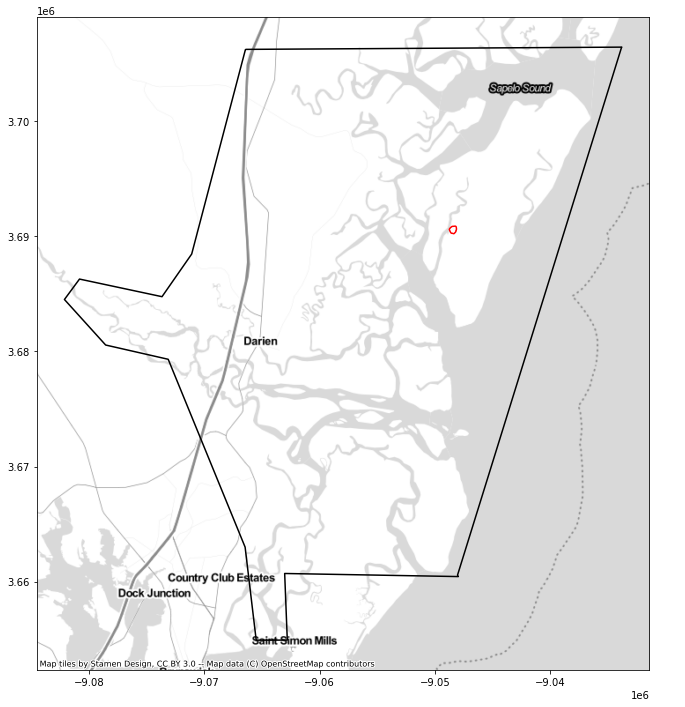

In [6]:
#Map of flux tower and GCE
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as ctx
import shapely

states = gpd.read_file('F:/US states/cb_2018_us_state_20m.shp').to_crs(3857) #Web mercator
states.crs

jojah = states[states['NAME'] == 'Georgia']

gce = gpd.read_file(gce_lter).to_crs(3857)
flux = gpd.read_file(gce_fluxproper).to_crs(3857)

p = gpd.GeoSeries(shapely.geometry.Point(31.3894, -81.2836), crs="epsg:4326").to_crs(3857)

fig, ax = plt.subplots (figsize = (12,12), alpha = 0.5, edgecolor = 'black')
# jojah.boundary.plot(ax = ax, edgecolor = 'black')
gce.boundary.plot(ax = ax, edgecolor = 'black')
# flux.boundary.plot(ax = ax, edgecolor = 'blue')
flux.plot(ax = ax, color = 'red')

ctx.add_basemap(ax, zoom = 11, source=ctx.providers.Stamen.TonerLite)

# p.plot(ax = ax, marker_type = "marker")

ax_inset = plt.axes([0.6, 0.6, 0.3, 0.3], projection='rectilinear')
jojah.boundary.plot(ax=ax_inset, color='white', edgecolor='black')

# Set limits for the inset axis to show the state of Georgia
ax_inset.set_xlim([-90, -80])
ax_inset.set_ylim([30, 35])


# Remove the inset axis frame and background
ax_inset.set_frame_on(False)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_facecolor('none')

plt.show()

# from matplotlib_scalebar.scalebar import ScaleBar

# ax.add_artist(ScaleBar(
#     dx=1,
#     units="km",
#      dimension="si-length",
#      length_fraction=0.25,
#     scale_formatter=lambda value, unit: f' {value * 1000} km ',
#     location='lower left'
# ))
# ax.set_yticks([])
# ax.set_xticks([])


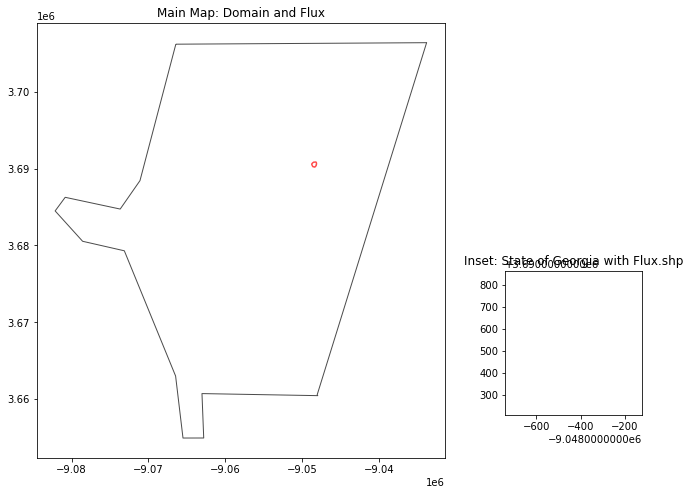

In [7]:
jojah = states[states['NAME'] == 'Georgia']
gce = gpd.read_file(gce_lter).to_crs(3857)
flux = gpd.read_file(gce_fluxproper).to_crs(3857)

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the main shapefiles (domain and flux)
gce.plot(ax=ax, color='none', edgecolor='black', alpha=0.7)
flux.plot(ax=ax, color='red', edgecolor='black', alpha=0.7)

# Create a new inset axes for Georgia
inset_ax = fig.add_axes([0.85, 0.2, 0.25, 0.25])  # [left, bottom, width, height]

# Plot the state of Georgia
jojah.plot(ax=inset_ax, color = 'none', edgecolor='black', alpha=0.7)

# Zoom in to the extent of flux.shp
flux_extent = flux.total_bounds
inset_ax.set_xlim(flux_extent[0], flux_extent[2])
inset_ax.set_ylim(flux_extent[1], flux_extent[3])

# Set title and labels
ax.set_title("Main Map: Domain and Flux")
inset_ax.set_title("Inset: State of Georgia with Flux.shp")

# Show the plot
plt.show()


<AxesHostAxes:title={'center':'State of Georgia'}>

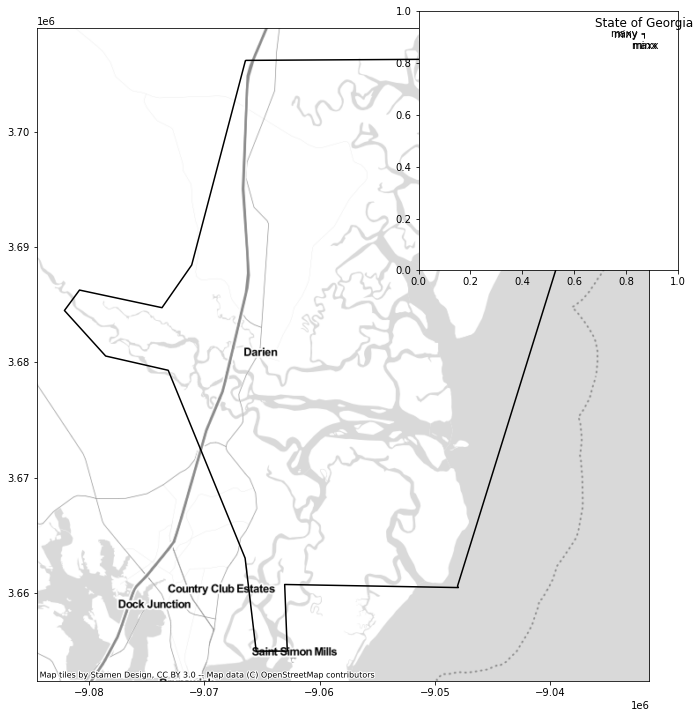

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots (figsize = (12,12), alpha = 0.5, edgecolor = 'black')
gce.boundary.plot(ax = ax, edgecolor = 'black')
ctx.add_basemap(ax, zoom = 11, source=ctx.providers.Stamen.TonerLite)

# ax = gce.plot(color='white', edgecolor='black', figsize=(10,10))

# Create an inset axis for the state of Georgia map
axins = plt.axes([0.6, 0.6, 0.3, 0.3], projection='rectilinear')
axins = zoomed_inset_axes(ax, 2, loc = 1)

# Plot the state of Georgia on the inset axis

# Set limits for the inset axis to show the state of Georgia
minx, miny, maxx, maxy = jojah.bounds
axins.set_xlim([minx, maxx])
axins.set_ylim([miny,maxy])

# Add a title to the inset axis
axins.set_title("State of Georgia")

# Remove the inset axis frame and background
# axins.set_frame_on(False)
# axins.set_xticks([])
# axins.set_yticks([])
# axins.set_facecolor('none')

# plt.show()
jojah.plot(ax=axins, color='black', edgecolor='black')
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# plt.show()

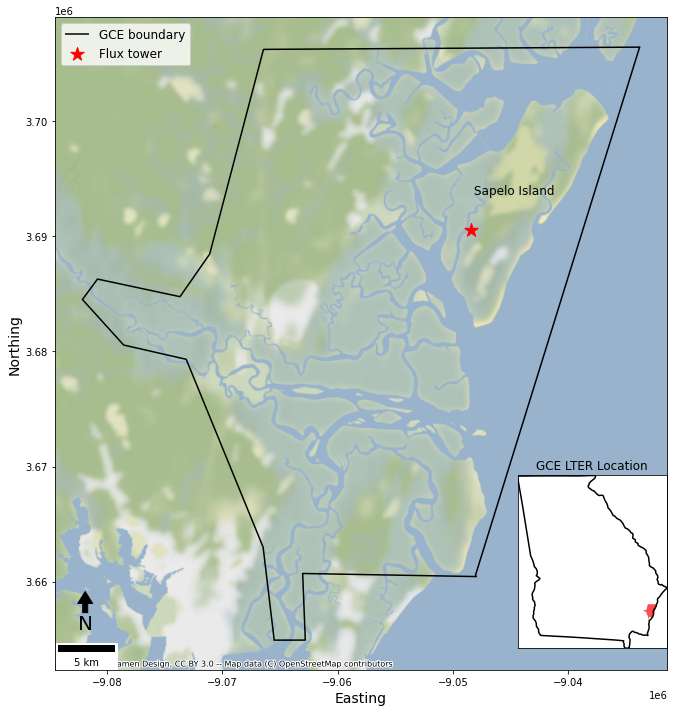

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import shapely

states = gpd.read_file('F:/US states/cb_2018_us_state_20m.shp').to_crs(3857) # Web mercator
states.crs

jojah = states[states['NAME'] == 'Georgia']

gce = gpd.read_file(gce_lter).to_crs(3857)
flux = gpd.read_file(gce_fluxproper).to_crs(3857)

flux_coords = gpd.GeoSeries(shapely.geometry.Point(-81.283462, 31.444088), crs="epsg:4326").to_crs(3857)

# p = gpd.GeoSeries(shapely.geometry.Point(31.3894, -81.2836), crs="epsg:4326").to_crs(3857)

# Create a GeoDataFrame for your main plot (gce and flux data)
main_plot_gdf = gpd.GeoDataFrame(geometry=gce.geometry.append(flux.geometry), crs=3857)

fig, ax = plt.subplots(figsize=(12, 12), alpha=0.5, edgecolor='black')

# jojah.boundary.plot(ax=ax, edgecolor='black')
gce.boundary.plot(ax=ax, edgecolor='black', label='GCE boundary')
# flux.boundary.plot(ax=ax, edgecolor='blue')
# flux.plot(ax=ax, color='red')

#Plot flux tower (just the tower)
flux_coords.plot(ax=ax, marker='*', color='red', markersize=200, label='Flux tower')

ctx.add_basemap(ax, zoom=11, source=ctx.providers.Stamen.TerrainBackground)

# p.plot(ax=ax, marker_type="marker")

# Create an inset axis for the state of Georgia map
ax_inset = plt.axes([0.68, 0.15, 0.2, 0.2], projection='rectilinear')

# Plot the state of Georgia on the inset axis
jojah.boundary.plot(ax=ax_inset, color='black', edgecolor='grey')

# Plot the main plot (gce and flux data) on the inset map
main_plot_gdf.plot(ax=ax_inset, color='red', alpha=0.7)

# Set limits for the inset axis to show the state of Georgia
minx, miny, maxx, maxy = jojah.total_bounds
ax_inset.set_xlim(minx, maxx)
ax_inset.set_ylim(miny, maxy)

# Add a title to the inset axis
ax_inset.set_title("GCE LTER Location")

# Remove the inset axis frame and background
ax_inset.set_frame_on(True)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_facecolor('white')

# Add a legend to the main map
ax.legend(loc='upper left', fontsize=12)

#Add SApelo label
label_coords = (31.47, -81.25)  
label_text = 'Sapelo Island'  
label_point_geo = gpd.GeoSeries(shapely.geometry.Point(label_coords[1], label_coords[0]), crs="epsg:4326").to_crs(3857)

ax.text(label_point_geo.x, label_point_geo.y, label_text, ha='center', va='center', color='black', fontsize=12)

from matplotlib_scalebar.scalebar import ScaleBar

scalebar = ScaleBar(1, location='lower left', units='m', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# Add a north arrow
x, y, arrow_length = 0.05, 0.12, 0.05
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Set x and y axis labels
ax.set_xlabel('Easting', fontsize=14)
ax.set_ylabel('Northing', fontsize=14)

#Save fig
# plt.savefig('flats_roi.png', bbox_inches='tight')
plt.show()


In [10]:
# fig, ax = plt.subplots(figsize=(12, 12), alpha=0.5, edgecolor='black')
# gce = gpd.read_file(gce_lter).to_crs(3857)
# flux = gpd.read_file(gce_fluxproper).to_crs(3857)

# # Plot the main data
# gce.boundary.plot(ax=ax, edgecolor='black')
# flux.plot(ax=ax, color='red')

# # Add the point to the map
# flux_coords.plot(ax=ax, marker='*', color='yellow', markersize=200)

# # Add basemap using contextily
# ctx.add_basemap(ax, zoom=11, source=ctx.providers.Stamen.TonerLite)

# # Set the aspect ratio to equal to avoid distortion due to different units in x and y
# ax.set_aspect('equal')

# plt.show()


In [11]:
jojah.bounds

,minx,miny,maxx,maxy
14,-9.529523e+06,3.550007e+06,-8.999415e+06,4.163970e+06


In [12]:
import folium
from folium.plugins import BeautifyIcon

# Make an empty map
m = folium.Map(location=[31.3894, -81.2836], tiles="OpenStreetMap", zoom_start=7)

ga_state = states[states['NAME'] == 'Georgia'].boundary

# star marker
icon_star = BeautifyIcon(
    icon='star',
    inner_icon_style='color:gold;font-size:30px;',
    background_color='transparent',
    border_color='transparent',
)

folium.Marker([31.3894, -81.2836], tooltip='star', icon=icon_star).add_to(m)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

m

# m.save('markers_on_folium_map.html')

In [13]:
#Map of flux tower and FLATS - average for year, or specific date? Which Landsat sensor?
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import ee
import os

ee.Initialize()

Map = geemap.Map(center=[31.539096,-81.422318], zoom=10)

gce_fluxdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_fluxdissolve.shp'

gce_fluxproper = 'F:/Wetlands shapefiles/GCE flux tower/sapelo_yearly_climatology-2019.shp'

gce = gpd.read_file(gce_lter).to_crs(3857)
aoi = gpd.read_file(gce_fluxproper).to_crs(3857)

flux_ga = geemap.shp_to_ee(gce_fluxproper)

In [14]:
def addFLATSL7(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(RED-SWIR)/(RED+SWIR) - 41.2*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))

##Function to cloud mask from the pixel_qa band of Landsat 5/8 SR data.
def maskL5sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
    .addBands(thermalBands, None, True) \
    .updateMask(qaMask) \
    .updateMask(saturationMask)

l7_col = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL7)

In [15]:
import geemap
import geopandas as gpd

# Load the shapefile of the area of interest
area_of_interest = gpd.read_file("path/to/shapefile.shp")

# Initialize the Google Earth Engine (GEE)
geemap.show_youtube()

# Define the Landsat dataset
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")

# Define the date range and location
date_range = ee.DateRange('2018-01-01', '2018-12-31')
location = area_of_interest.geometry.iloc[0]

# Filter the image collection to the area of interest and date range
filtered_collection = landsat.filterBounds(location).filterDate(date_range)

# Select the image with the least cloud cover
cloud_cover = ee.Image(filtered_collection.sort("CLOUD_COVER").first())

# Create a false color composite using bands 4,3,2
false_color = cloud_cover.select("B4","B3","B2").divide(10000)

# Clip the image to the area of interest
clipped_image = false_color.clip(location)

# Display the clipped image on geemap
geemap.add_ee_layer(clipped_image, {'min':0, 'max':1}, 'False color composite')
geemap.add_ee_layer(area_of_interest, {"color": "green"}, "Area of interest")

# Center the map on the area of interest
geemap.center_map(location)

DriverError: path/to/shapefile.shp: No such file or directory

In [16]:
#Map of GCE and FLATS - average for year, or specific date? Which Landsat sensor?

##FLATS
def addFLATSL7(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(RED-SWIR)/(RED+SWIR) - 41.2*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL5(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.972*(RED-SWIR)/(RED+SWIR)-0.008) - 41.2*(0.991*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)-0.0014)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))


def addFLATSL8(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.841*(RED-SWIR)/(RED+SWIR) - 0.019) - 41.2*(0.771*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1) + 0.011)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL9(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(1.225*(RED-SWIR)/(RED+SWIR) + 0.096) - 41.2*(1.038* (NIR-RED)/(NIR+6*RED-7.5*BLUE+1) - 0.004)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

#Note on landsat 9: calibrated to L7 - originally calibrated to L8

#Flats equation when evi is subbed in: flats = 1.51+(-41.2*evi) + 12.5*ndwi

##MASKING FLATS
def maskFLATS(image):
    mask1 = image.select('flats').lte(0.1) #less than or equal to 0.1 - change?
    return image.updateMask(mask1)

##Function to cloud mask from the pixel_qa band of Landsat 5/8 SR data.
def maskL5sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
    .addBands(thermalBands, None, True) \
    .updateMask(qaMask) \
    .updateMask(saturationMask)

#ndvi - before and after applying FLATs
##ADDING NDVI (for min/max variables)
def addL5ndvi(image):
    ndvi = image.expression(
        '(NIR-RED)/(RED+NIR)', {
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'GREEN': image.select('SR_B2')
        })
    
    return image.addBands(ndvi.rename('ndvi'))

def addL8ndvi(image):
    ndvi = image.expression(
        '(NIR-RED)/(RED+NIR)', {
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3')
        })
    
    return image.addBands(ndvi.rename('ndvi'))

#Mapping a continuous time series using calibrated data

l8_col = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga) \
    .map(maskL5sr).map(addFLATSL8).map(addL8ndvi)

l7_col = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL7).map(addL5ndvi)

l5_col = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL5).map(addL5ndvi)

l9_col = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL9).map(addL8ndvi)

L5_1 = l5_col.first()
L7_1 = l7_col.first()
L8_1 = l8_col.first()
L9_1 = l9_col.first()

l8_rec = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(2020, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL8).map(addL8ndvi)

In [17]:
def addOLDFLATS(image):
    oldflats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(-1.57 + 20*(RED-SWIR)/(RED+SWIR) + 68.6*(GREEN-RED)/(GREEN+RED)))', {
            'SWIR': image.select('SR_B6'),
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3')
        })
    
    return image.addBands(oldflats.rename('oldflats'))

yearlist_7 = l7_col.toList(l7_col.size())
yearlist_8 = l8_rec.toList(l8_rec.size())

x = ee.Image(yearlist_7.get(30))
y = ee.Image(yearlist_8.get(40))
z = addOLDFLATS(addFLATSL8(maskL5sr(ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_016038_20220710'))))

# Map.addLayer(z, {'bands': ['oldflats'], 'min': 0, 'max': 1}, 'Flats L7')
# Map

In [18]:
y.getInfo()

{'type': 'Image',
 'bands': [{'id': 'SR_B1',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7651, 7781],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 435285, 0, -30, 3628215]},
  {'id': 'SR_B2',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7651, 7781],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 435285, 0, -30, 3628215]},
  {'id': 'SR_B3',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7651, 7781],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 435285, 0, -30, 3628215]},
  {'id': 'SR_B4',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7651, 7781],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 435285, 0, -30, 3628215]},
  {'id': 'SR_B5',
   'data_type': {'type'

In [19]:
#Preliminary choices for low/high comparison (from FLATS comparison and FLATS pairs and plots - CLIPPED):

#L5
L5_low = addFLATSL5(maskL5sr(ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_017038_19990328')))
L5_high = addFLATSL5(maskL5sr(ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_017038_19991225')))

#L7
L7_low = addFLATSL7(maskL5sr(ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_016038_20020508')))
L7_high = addFLATSL7(maskL5sr(ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_016038_20020201')))

#L8
L8_low = addFLATSL8(maskL5sr(ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_016038_20201211')))
L8_high = addFLATSL8(maskL5sr(ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_017038_20201116')))

#L9
L9_low = addFLATSL9(maskL5sr(ee.Image('LANDSAT/LC09/C02/T1_L2/LC09_017038_20211229')))
L9_high = addFLATSL9(maskL5sr(ee.Image('LANDSAT/LC09/C02/T1_L2/LC09_017038_20220303')))

Map.addLayer(L5_low, {'bands': ['flats'], 'min': 0, 'max': 1}, 'Low L5')
Map.addLayer(L5_high, {'bands': ['flats'], 'min': 0, 'max': 1}, 'High L5')

Map.addLayer(L7_low, {'bands': ['flats'], 'min': 0, 'max': 1}, 'Low L7')
Map.addLayer(L7_high, {'bands': ['flats'], 'min': 0, 'max': 1}, 'High L7')

Map.addLayer(L8_low, {'bands': ['flats'], 'min': 0, 'max': 1}, 'Low L8')
Map.addLayer(L8_high, {'bands': ['flats'], 'min': 0, 'max': 1}, 'High L8')

Map.addLayer(L9_low, {'bands': ['flats'], 'min': 0, 'max': 1}, 'Low L9')
Map.addLayer(L9_high, {'bands': ['flats'], 'min': 0, 'max': 1}, 'High L9')

Map

Map(center=[31.539096, -81.422318], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

In [ ]:
#Mapping
from geemap import cartoee
import cartopy.io.img_tiles as cimgt

#lOW TIDE

#Image to single band
l5low = L5_low.select('flats')

# geospatial region in format [E,S,W,N]
region = [-80.75, 31, -81.5, 32]  # define bounding box to request data
out_region = [180, -60, -180, 85]
zoom_region = [-81.15, 31.35, -81.45, 31.55]
flux_region = [-81.26, 31.42, -81.3, 31.45]

vis = {'min': 0, 'max': 1}  # define vis parameters for image

cmap = "gray"

fig = plt.figure(figsize=(15, 10))

basemap = cimgt.Stamen('terrain-background')

# use cartoee to get a map
ax = cartoee.get_map(l5low, region=flux_region, vis_params=vis, cmap = cmap, basemap='SATELLITE', zoom_level=13)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(ax, vis, cmap = cmap, loc="right", label="FLATS value", orientation="vertical")

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

# add coastlines using the cartopy api - way off! check with zoomed out image
# ax.coastlines(color="red")

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.7, 0.25), text_color="white", arrow_color="white", fontsize=20
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=1, xy=(0.7, 0.05), fontsize=20, color="white", unit="km"
)

# plt.savefig("C:/Users/arj26323/Documents/ga_img.jpg", dpi=1000, bbox_inches = "tight")

##More info here: https://geemap.org/notebooks/50_cartoee_quickstart/#plotting-an-image
##And here: https://geemap.org/notebooks/66_cartoee_legend/
##https://geemap.org/notebooks/112_cartoee_basemap/#use-other-basemaps

In [ ]:
#High tide

#Image to single band
l5high = L5_high.select('flats')

# geospatial region in format [E,S,W,N]
region = [-80.75, 31, -81.5, 32]  # define bounding box to request data
out_region = [180, -60, -180, 85]
zoom_region = [-81.15, 31.35, -81.45, 31.55]
flux_region = [-81.26, 31.42, -81.3, 31.45]

vis = {'min': 0, 'max': 1}  # define vis parameters for image

cmap = "gray"

fig = plt.figure(figsize=(15, 10))

basemap = cimgt.Stamen('terrain-background')

# use cartoee to get a map
ax = cartoee.get_map(l5high, region=flux_region, vis_params=vis, cmap = cmap, basemap='SATELLITE', zoom_level=13)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(ax, vis, cmap = cmap, loc="right", label="FLATS value", orientation="vertical")

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

# add coastlines using the cartopy api - way off! check with zoomed out image
# ax.coastlines(color="red")

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.7, 0.25), text_color="white", arrow_color="white", fontsize=20
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=1, xy=(0.7, 0.05), fontsize=20, color="white", unit="km"
)

# plt.savefig("C:/Users/arj26323/Documents/ga_img.jpg", dpi=1000, bbox_inches = "tight")

##More info here: https://geemap.org/notebooks/50_cartoee_quickstart/#plotting-an-image
##And here: https://geemap.org/notebooks/66_cartoee_legend/
##https://geemap.org/notebooks/112_cartoee_basemap/#use-other-basemaps